In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import warnings
warnings.filterwarnings('ignore')

### Multiple Linear Regression

Multiple regression model is used when multiple predictor variables [X1
, X2
, X3
, …, Xn
]
are used to predict the response variable Y

y = β0 + β1x1 + β2x2 + β3x3 + … +βnxn + ε

β0, β1, β2, β3, …, βn 

are the parameters of the linear regression model with n independent variables


In [20]:
advert = pd.read_csv('advertising.csv')
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [21]:
# Lets create a simple linear regression model sale~Tv
model1 = sfa.ols('Sales~TV',data=advert).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.93e-74
Time:                        13:32:28   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.000       6.339       7.611
TV             0.0555      0.002     29.260      0.000       0.052       0.059
==============================================================================
Omnibus:                        0.013   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.043
Skew:                          -0.018   Prob(JB):                        0.979
Kurtosis:                       2.938   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Lets create a multiple simple linear regression model sale~Tv+radio
model2 = sfa.ols('Sales~TV+Radio',data=advert).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          2.39e-100
Time:                        13:32:28   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Lets create a multiple simple linear regression model sale~Tv+radio+Newspaper
model3 = sfa.ols('Sales~TV+Radio+Newspaper',data=advert).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.13e-99
Time:                        13:32:28   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q. Calculate SSE, SST and SSR and R2

In [24]:
advert['Sales_pred']=model3.predict(advert[['TV','Radio','Newspaper']])
advert.head()

,TV,Radio,Newspaper,Sales,Sales_pred
0,230.1,37.8,69.2,22.1,21.220972
1,44.5,39.3,45.1,10.4,11.268248
2,17.2,45.9,69.3,12.0,10.496209
3,151.5,41.3,58.5,16.5,17.312447
4,180.8,10.8,58.4,17.9,15.644137


In [25]:
yi = advert['Sales']
y_hat = advert['Sales_pred']
y_bar = np.mean(advert['Sales'])

SSE=np.sum((yi-y_hat)**2)
SST=np.sum((yi-y_bar)**2)
SSR= SST-SSE
R2=SSR/SST

print('SSE:',SSE)
print('SST:',SST)
print('SSR:',SSR)
print('R2:',R2)

SSE: 541.2012295254631
SST: 5555.98395
SSR: 5014.782720474537
R2: 0.902591289968456


### Q. Test the Model Significance (ANOVA for regression)

In [26]:
# f-statistic
n=advert.shape[0]
dfn = k=3
dfd = n-k-1

MRSS = SSR/dfn
MESS = SSE/dfd

f_stat = MRSS/MESS
print('F-Statistic:',f_stat)

F-Statistic: 605.3801307108602


In [27]:
p_value = 1-stats.f.cdf(f_stat,dfn=dfn,dfd=dfd)
print('p_value',p_value)

p_value 1.1102230246251565e-16


In [28]:
# h0: The model is not significant
# ha: The model is significant
if p_value < 0.05:
    print('Reject Ho:')
else:
    print('Fail to reject Ho:')

Reject Ho:


## Assumptions of Linear Regression

● The dependent variable must be numeric

● Linear relationship between dependent and independent variables

● Predictors must not show multicollinearity

● Independence of observations should exist (Absence of Autocorrelation)

● The error terms should be homoscedastic

● The error terms must follow normal distribution

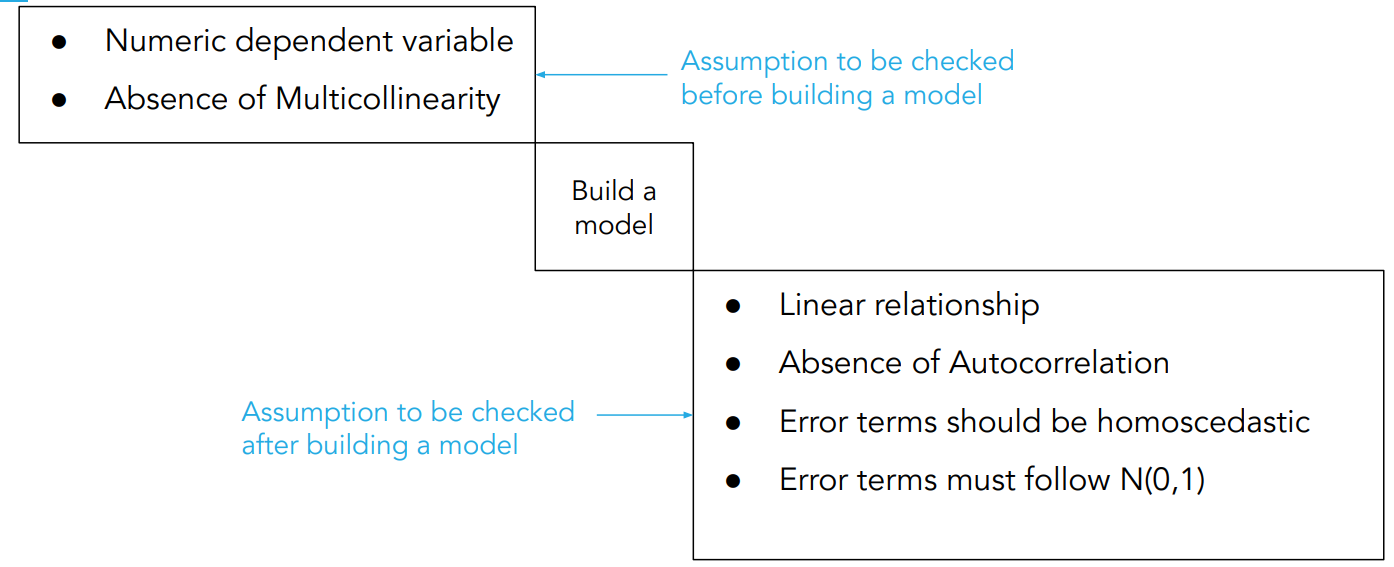

In [29]:
advert = pd.read_csv('advertising.csv')
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Tests before model building

### Is the dependent variable numeric?

● Regression Analysis requires the target  variable to be numeric in nature

● For example: returns, sales of a product, yield of a crop, risk in financial services

In [30]:
advert['Sales'].describe()

count    200.000000
mean      15.130500
std        5.283892
min        1.600000
25%       11.000000
50%       16.000000
75%       19.050000
max       27.000000
Name: Sales, dtype: float64

assumption1 : The target variable 'sales' is numerical

### Is there multicollinearity?

* Predictors variable should not be highly correlated amongst each other

why?- because the preictors have the same identification power and it would become difficult to identify which one of those predictors are responsible in generating the prediction

the ideal hypothesis is that the predictors should be of independent nature.

**Correlation Plot** Generally, dring EDA we come across the corr plot.

If two **predictors are highly correlated amongst each oher** then we'll **drop** that **predictor which has less correlation with the Target**

**Condition number** Condition number is another way to find multicollinearity in the variables.

* CN number is **<100**: **NO COLLINEARITY** where as if 
* CN number is between **100-1000**: **MILD COLLINEARITY**
* CN number is **>1000**:**SEVERE COLLINEARITY** 

#### condition number we can see in the table (model table)



**VARIANCE INFLATION FACTOR**  (VIF IS ONLY APPLIED ON PREDICTORS)


* SO, in this deployment, it takes all the predictors and removes the target
* Now, it will make one predictor as targetand using remaining predictors, it will build a model and calculate the R-sq. That R square is used to calculate the VIF value. 

**VIF = 1/(1-R2)**

(VIF TELLS US WHICH FEATURE AREHIGHLY COLLINEAR, HOWEVER< COND NUMBER JUST TELLS US THAT WHETHER THE FEATURES ARE COLLINEAR OR NOT)

**VIF VALUE = 1: NO COLLINEARITY**
**VIF VALUE 1 to 5: MILD COLLINEARITY**
**VIF VALUE > 5: SEVERE COLLINEARITY**

<Axes: >

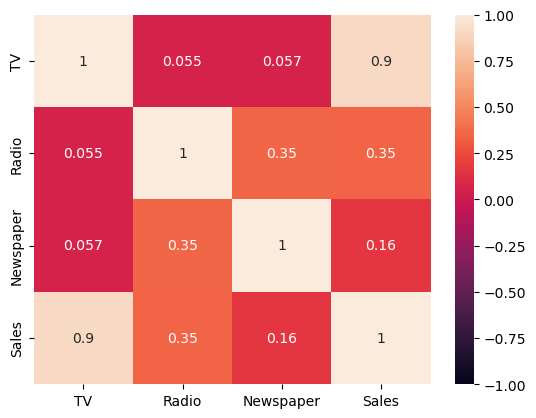

In [31]:
sns.heatmap(advert.corr(),annot=True,vmax=1,vmin=-1)

In [32]:
# VIF
X= advert.drop(columns=['Sales'])

vif_list= []

for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(X.values,i))
    
pd.DataFrame({'Feature Names':X.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Feature Names,VIF
1,Radio,3.285462
2,Newspaper,3.055245
0,TV,2.486772


In [40]:
## Calculate the VIF's for all the three columns

In [43]:
model_TV = sfa.ols('TV~Radio+Newspaper',data=advert).fit()
R2_TV = model_TV.rsquared

VIF_TV =1/(1-R2_TV)
print('VIF_TV',VIF_TV)

VIF_TV 1.0046107849396502



## Tests after model building the Model

In [33]:
X = X
Y = advert['Sales']

X_c = sma.add_constant(X)

model = sma.OLS(Y,X_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           8.13e-99
Time:                        13:32:28   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

as the CN is <1000 there is mild co linearity in data

### Existence of linear relationship

● The independent variables must have a linear relationship with the dependent variable

● This can be checked plotting a scatter plot of residuals vs predictors

● A scatter plot depicting no pattern indicates that the variable has a linear relationship with the response variable

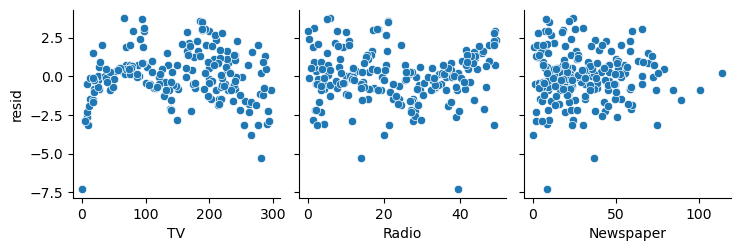

In [36]:
advert['resid'] = model.resid
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars=['resid'],data=advert)

* for linear relationship the points must be at random
* the points must not exhibit much distinctive pattern

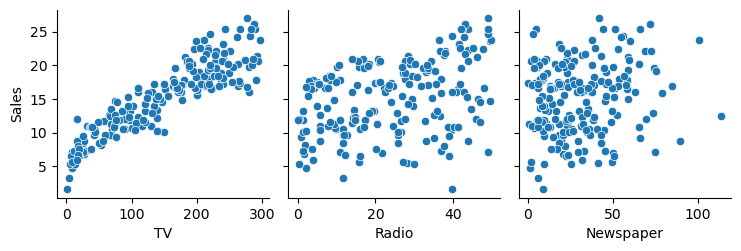

In [37]:
sns.pairplot(x_vars = ['TV','Radio','Newspaper'], y_vars=['Sales'], data = advert)


In [38]:
# in order to have a final conclusion lets apply a rainbow test to check for linearity
from statsmodels.stats.diagnostic import linear_rainbow

#ho : That variables are linear
# ha: variables are not linear
pvalue = linear_rainbow(model)[1]

if pvalue < 0.05:
    print('reject ho')
else:
    print('fail to reject the ho:')

fail to reject the ho:


### Assumption of autocorrelation

● Assumption of autocorrelation is violated when residuals are correlated within themselves, ie they are serially correlated

● Autocorrelation does not impact the regression coefficients but the associated standard errors are reduced

● This reduction in standard error leads to a reduction in associated p-value

● It incorrectly concludes that a predictor is statistically significant

**Causes of Autocorrelation**

● Some important variables are not considered in the data

● If the relationship between the target and predictor variables is non-linear and is incorrectly considered linear

● Presence of carry over effect

Example: The additional expenses from the budget for last month are carried over in 
creating the budget for next month


**Durbin Watson Test**

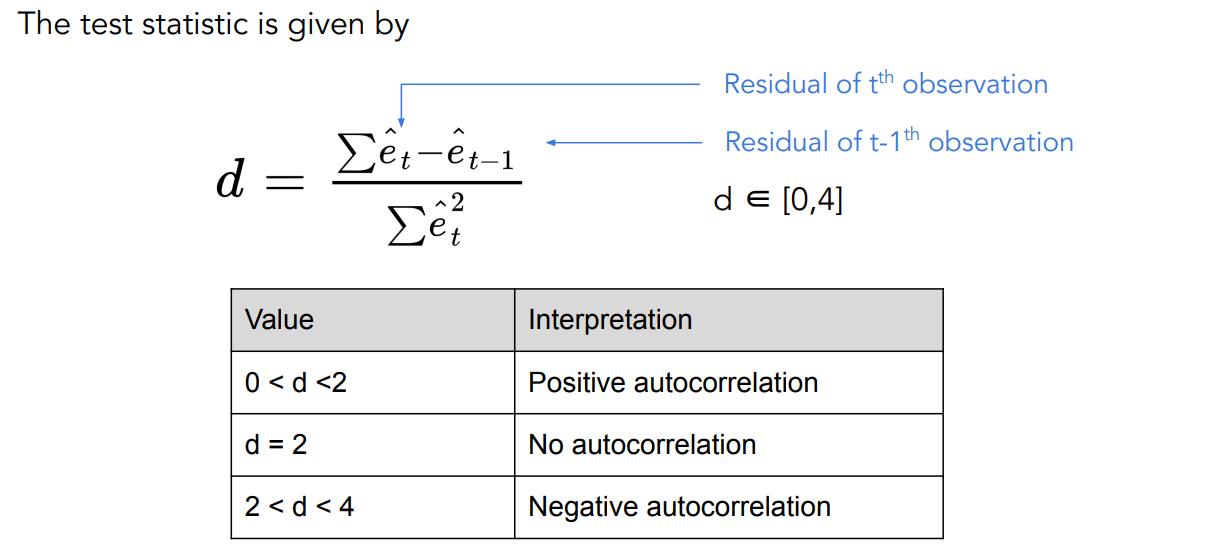

since Durbin Watsin is 2.25, which is between 1.5-2.5, we can say that there is no auto corelation in residuals

### Homoscedasticity assumption

● Variance of the residual is assumed to be independent of the explanatory variables

● Heteroscedasticity: non-constant variance of residuals

● It happens due to the presence of extreme values

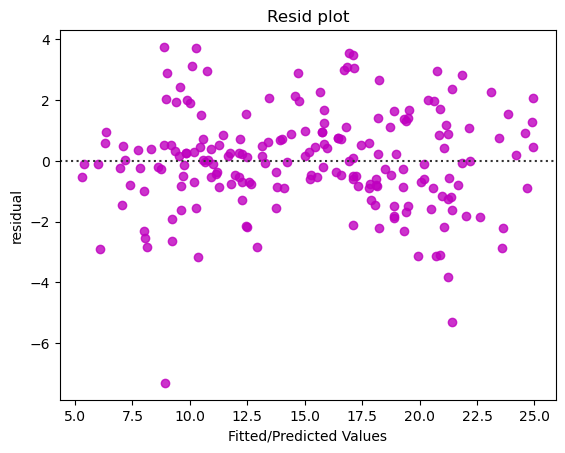

In [44]:
# residual plot
sns.residplot(x=model.fittedvalues,y=model.resid,color='m')
plt.xlabel('Fitted/Predicted Values')
plt.ylabel('residual')
plt.title('Resid plot')
plt.show()

**The statistical test to test for the homoskedasticity of the errors are**

● Goldfeld Quandt test

● Breusch Pagan test

In [51]:
# goldfeld quandt test

# Ho: The variance is same: Homoskedastic
# Ha: The variance is not same: Heteresckedastic

p_value=sma.stats.diagnostic.het_goldfeldquandt(x=X_c,y=Y)[1]

if p_value> 0.05:
    print ('Fail to reject Ho:')
else:
    print('reject Ho')

Fail to reject Ho:


### Normality test

<Axes: ylabel='Density'>

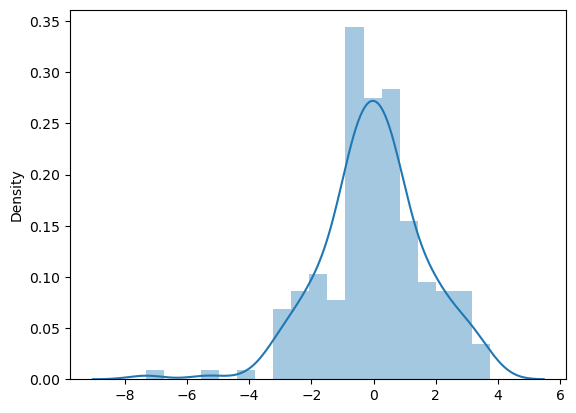

In [47]:
sns.distplot(model.resid)

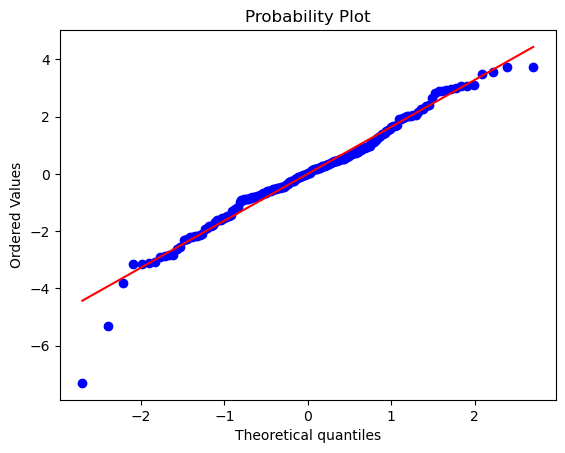

In [48]:
# QQ plot
stats.probplot(model.resid,plot=plt)
plt.show()

● Parametric statistical methods assume that the underlying data has a normal distribution

● Normality tests are used to determine if a data set is well-modeled by a normal distribution

**Normality testing techniques**

● Quantile-Quantile Plot

● Jarque-Bera (JB) Test

● Shapiro-Wilk Test

In [49]:
# Sahpiro will test (n < 5000)
# Ho: The data is normal
# Ha: The data is not normal

p_value=stats.shapiro(model.resid)[1]
if p_value> 0.05:
    print ('Fail to reject Ho:')
else:
    print('reject Ho')

reject Ho


In [50]:
# jarque will test (N>2000)
# Ho: The data is normal
# Ha: The data is not normal

p_value=stats.jarque_bera(model.resid)[1]
if p_value> 0.05:
    print ('Fail to reject Ho:')
else:
    print('reject Ho')

reject Ho
